## 1.5 Decision Theory

假设我们有输入变量$\mathbf{x}$ 和相应的输出目标变量$\mathbf{t}$，当然对于回归和分类问题的差别仅在于目标变量$\mathbf{t}$是连续的还是离散的。从数据中学习的结果用联合概率$p\left(\mathbf{x}, \mathbf{t}\right)$ 来描述。显然，即使我们得到了联合概率，任然需要对相应的输入变量$\mathbf{x}$ 做出对目标变量$t$ 的判断，根据联合概率进行推断的过程有比较多不同的规则，例如有最小的错误概率规则，还有一些其他规则，比如最小价值，因为不同错误带来的价值是有差异的，例如在根据x光片判断生病与否的案例中，显然把阴性判为阳性带来的后果比把阳性判为阴性的后果严重的多。

### 1.5.1 Minimizing the misclassification rate

决策域 $\mathcal{R}_k$ : 当输入变量落入该区域时将该变量的输出类别判为$\mathcal{C}_k$;
错误率： $p\left(mistake\right) = p\left(\mathbf{x}\in\mathcal{R}_1, \mathcal{C}_2 \right) +p\left(\mathbf{x}\in\mathcal{R}_2, \mathcal{C}_1\right) = \int_{\mathcal{R}_1}p\left(\mathbf{x}, \mathcal{C}_2\right)dx + \int_{\mathcal{R}_2}p\left(\mathbf{x}, \mathcal{C}_1\right)dx$

显然的，在上述的两类分类策略中，我们需要确定决策域$\mathcal{R}_1, \mathcal{R}_2$， 以使得积分结果最小，一个显著的策略就是，如果$p\left(\mathbf{x}, \mathcal{C}_1\right) > p\left(\mathbf{x}, \mathcal{C}_2\right)$, 那么该区域就划分为$\mathcal{R}_1$，也就是将该输入判断为$\mathcal{C}_1$类。


根据概率论的乘法规则，$p\left(\mathbf{x}, \mathcal{C}_k\right) = p\left(\mathcal{C}_k | x\right)\left(\mathbf{x}\right)$， 而其中的$p\left(\mathbf{x}\right)$ 是公共项，因此我们在最小化错误率的时候是相当于最大化后验概率$p\left(\mathcal{C}_k | \mathbf{x}\right)$。 

在整个决策过程总相当于最大化正确率：
$$
p\left(correct\right) = \sum_{k = 1}^K p\left(\mathbf{x}\in\mathcal{R}_k, \mathcal{C}_k\right) \\
= \sum_{k = 1}^K \int_{\mathcal{R}_k}p\left(\mathbf{x}, \mathcal{C}_k\right)
$$

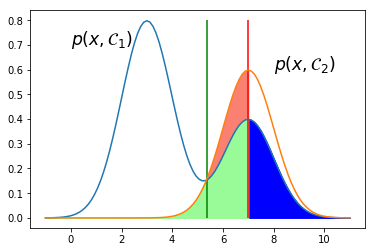

In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
fig, ax = plt.subplots();
x_observe = np.linspace(-1, 11, 100);
y_1 = 2 * norm.pdf(x_observe, loc= 3) + norm.pdf(x_observe, loc = 7);
y_2 = 1.5*norm.pdf(x_observe, loc = 7);
plt.plot(x_observe, y_1, x_observe, y_2);

ax.fill_between(x_observe[x_observe <= 7], y_2[x_observe <= 7], color="salmon");
ax.fill_between(x_observe[x_observe >= 7], y_1[x_observe >= 7], color="blue");
ax.fill_between(x_observe[x_observe <= 7], np.min(np.vstack([y_1[x_observe <= 7], y_2[x_observe <= 7]]), axis=0), color="palegreen");
#ax.fill_between(x_observe[x_observe < 7], y_2[y_2<y_1], color="palegreen");
plt.vlines(5.38, [0], 0.8, 'g'); plt.vlines(7, [0], 0.8, 'r')
ax.text(0, 0.7, r"$p(x, \mathcal{C}_1)$", fontsize="xx-large")
ax.text(8, 0.6, r"$p(x, \mathcal{C}_2)$", fontsize="xx-large")

假设我们的决策线为上图中的红色竖线，也就是说在红色实线左侧我们将会把输入数据判为类别$\mathcal{C}_1$，而在红色实线右侧判为$\mathcal{C}_2$, 这样以来，我们的决策错误率也就是图中彩色块的面积，其中红色加上绿色色块表示属于$\mathcal{C}_2$而被判为了$\mathcal{C}_1$， 蓝色表示数于$\mathcal{C}_1$而被判为了$\mathcal{C}_2$； 因为不管如何划分决策域，图中的蓝色和绿色式中都要被错分，因此，最小化错误绿的结果就是最小化红色色块，也就得到图中的绿色决策线。此时错误率恰好等于绿色色块加上蓝色色块面积。

### 1.5.2 Minimizing the expected loss

最小的期望损失，考虑如下简单例子，也就是一个病人很健康被错判为生病，那么会给病人带来一些失落，进一步诊断之后并不会带来过多的损失，然而如果一个生病的病人被错判为健康的，那么这种情况下，很有可能病人会因为延误诊断时机导致较大的损失，甚至死亡，也就是说在两种错判情况下的损失函数是不一样的。

损失函数（loss function, or cost function）或者还有一种表述效用函数（utility function）, 定义损失矩阵$L_{k,j}$，其中的元素 $l_{k,j}$ 为将本为类别 $k$ 的输入变量 $\mathbf{x}$ 错判为 $j$ 的损失。那么本决策的目标是最小化期望损失。
$$
\mathbb{E}[L]\sum_{k}\sum_{j}\int_{\mathcal{R}_j}L_{k,j}p\left(\mathbf{x},\mathcal{C}_k\right)d\mathbf{x}
$$
因为一般情况下正确判断类别的没有损失，所以，我们的决策在于根据最小化平均损失  $\sum_{k}L_{k,j}p_\left(\mathbf{x}, \mathcal{C}_k\right)$ 确定决策域 $\mathcal{R}_j$ 


### 1.5.3 The reject option
在分类的时候，错误一般来源于$p\left(\mathcal{C}_k| \mathbf{x}\right)$， 小于1 的情况，也就是说当前两种分类策略都是存在的，只不过存在一种情况的可能性更大一些，而有时候一个输入分为多个类别的可能性相当更有可能产生较大的错误率，我们人为将难以区分的区域定义为拒绝选项（Reject option）， 比如说在根据X光片判断病变与否的例子中，我们用机器来判别那些相对容易判断的情况，而对于那些比较模糊判断情况，人为专家判定。在决定是否需要认为判定的时候，我们定义参数 $\theta$ ， 如下图所示。

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def sigmoid(x):
    return np.exp(x) /(1+np.exp(x))

x_observe  = np.linspace(-6, 6, 200);
y_observe = sigmoid(x_observe);
fig, ax = plt.subplots();
plt.plot(x_observe, y_observe, 'r', x_observe, 1- y_observe, 'b');
ax.set_yticks([0,0.85, 1]);
ax.set_yticklabels(["$0.0$", r"$\theta$","$1.0$"], fontsize = "xx-large");

ax.plot([-1.73, -1.73],[0,0.85],'g'); ax.plot([1.73, 1.73],[0,0.85],'g');  ax.plot([-6,6],[0.85,0.85],'g--');
ax.spines['bottom'].set_position(('data',0));
ax.text(-5.5, 0.95,'$p(\mathcal{C}_1|x)$'); ax.text(4.5, 0.95,'$p(\mathcal{C}_2|x)$');
ax.text(-1.5,-0.15,'reject region');
plt.show()

在上面的图中，$\theta$ 的值影响拒绝域大小，$\theta=1$ 时， 所有的输入都会被拒绝，而对于K 类的判别系统中，$\theta< \frac{1}{K}$ 时，所有的输入都不会被拒绝。

### 1.5.4 Inference and decision

我们可以将分类问题划分为两个步骤：1. 推断步骤（inference stage）:通过训练数据学习模型得到 $p\left(\mathcal{C}_k |\mathbf{x}\right)$; 2. 决策步（decision stage）:通过后验概率得到最佳的判别结果对数据进行判断。


而有一些方法可以将两个步骤连起来，直接从数据学习判断的函数，从判断的函数直接可以计算判断的结果，这种方程称为决策方程（discriminant function）.

实际上，可以将分类问题划分为三种不同的方法：

* 生成模型：学习输入变量和输出变量的联合分布 $p\left(\mathbf{x}, \mathcal{C}_k\right)$, 然后得到输入变量的分布，计算后验概率进行分类。生成模型方法复杂度较高，在学习过程中需要知道数据的生成方法；
* 判别模型：学习后验概率 $p\left(\mathcal{C}_k| \mathbf{x}\right)$ ；该方法复杂度中等，学习过程中并不需要知道数据的生成方法，我们只需要将模型进行分类，模型的联合分布未知；
* 判别函数： 更加简单的方法，学习分类函数 $f\left(\mathbf{x}\right) $；复杂都最低，只需要学习输入和输出的对应关系，例如支持向量机方法。

对于复杂度较高的生成式模型中，可以由以下好处：
* 可以以最小风险准则分类；
* 可以灵活的设置拒绝域；
* 可以从先验中补偿由于数据带来的误差；
* 可以组合多个模型；

### 1.5.5 Loss function for regression
前面讨论的都是分类问题，现在考虑回归问题，与前面的曲线拟合问题类似，我们在决策阶段需要寻找一个对输入问题的输出的预测函数 $y\left(\mathbf{x}\right)$ 首先档案是寻找一个损失函数，用来计算期望损失：$ \mathbb{E}[L] = \int\int L\left(t, y\left(\mathbf{x}\right)\right)p\left(\mathbf{x},t\right)d\mathbf{x}dt$;

最常见的损失函数是二次损失函数 $L\left(t, y\left(\mathbf{x}\right)\right) = \{ y\left(\mathbf{x}\right)-t \}^2$

采用变分法：
** 注！变分法 **
$$
\begin{split}
\delta \mathbb{E}[L] = \int\int  2\{y\left(\mathbf{x}\right)-t\}p\left(\mathbf{x},t\right) \delta y d\mathbf{x}dt =0 
\end{split}
$$
由于 $\delta y$ 的任意性（参考变分法），可以得到 $2\int \{y\left(\mathbf{x}\right)-t\}p\left(\mathbf{x},t\right)dt =0$

故满足：

$$ 
\begin{split}
\frac{\delta \mathbb{E}[L]}{\delta y\left(\mathbf{x}\right)}=0
\Rightarrow  2\int \{y\left(\mathbf{x}\right)-t\}p\left(\mathbf{x},t\right)dt =0 
\end{split}
$$

那么得到： 
$$ 
y\left(\mathbf{x}\right) = \frac{\int t p\left(\mathbf{x},t\right)dt}{p\left(\mathbf{x}\right)} = \int t p\left(t | \mathbf{x}\right)dt  = \mathbb{E}_t[t|\mathbf{x}]
$$
其中 $y\left(\mathbf{x}\right)$ 称为回归方程。

采用另外一种方法计算： 首先我们展开其中的二次损失函数：
$$
\begin{split}
\{y\left(\mathbf{x}\right)-t\}^2 &= \{y\left(\mathbf{x}\right)-\mathbb{E}[t|\mathbf{x}] +\mathbb{E}[t|\mathbf{x}] - t\}^2 \\
&=\{y\left(\mathbf{x}\right)-\mathbb{E}[t|\mathbf{x}] \}^2 +2\{y\left(\mathbf{x}\right)-\mathbb{E}[t|\mathbf{x}]\}\{\mathbb{E}[t|\mathbf{x}] - t\}+\{\mathbb{E}[t|\mathbf{x}] - t\}^2
\end{split}
$$

带入原始的损失计算公式，其中的交叉项为0， 那么有：
$$
\mathbb{E}[L] = \int\{y\left(\mathbf{x}-\mathbb{E}[t|\mathbf{x}]\right)\}^2p\left(\mathbf{x}\right)d\mathbf{x} + \int var\{t|\mathbf{x}\}p\left(\mathbf{x}\right)d\mathbf{x}
$$
上式中，第一项和函数 $y\left(\mathbf{x}\right)$ 有关，后面一项是条件方差的期望。因此，最小化损失函数，可得到 相同的结论。

#### 以上面的回归过程为例，我们可以统计回归问题的三种（生成模型，判别模型和判别函数）解法
a) 生成模型： 首先计算联合分布 $p\left(\mathbf{x}, t\right)$ , 然后归一化得到后验概率 $ p\left(t |\mathbf{x}\right) $; 最后通过上面的结论计算出条件期望，得到模型的解；

b) 判别模型： 直接计算条件分布 $ p\left(t |\mathbf{x}\right) $， 然后计算条件期望，得到模型的解；

c) 判别函数： 直接从训练数据中得到回归函数 $y\left( \mathbf{x} \right)$;

####  损失函数的选择
有一种二次函数的推广，Minkowski损失函数： 
$$
\mathbb{E}[L_q] = \int\int \| y\left(\mathbf{x}\right)-t \|^q p\left(\mathbf{x},t\right)d\mathbf{x}dt$
$$
其中 $q=2$ 最小化 $\mathbb{E}[L]$ 得条件均值， 而 $q=1$ 时最小化$\mathbb{E}[L]$得条件中值， $q\rightarrow 0$ 时最小化 $\mathbb{E}[L]$ 得条件众数。

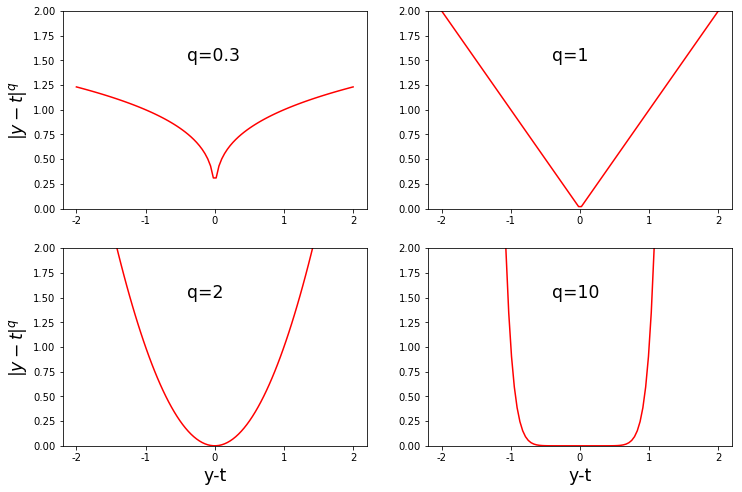

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

fig, axes  = plt.subplots(2,2,figsize =[12,8]);
axes = axes.flatten();
qs = [0.3, 1,2,10];

x_data = np.linspace(-2,2,100);
for q,ax in zip(qs, axes):
    ax.plot(x_data, np.abs(x_data)**q, 'r');
    ax.set_ylim(0,2);
    ax.set_xticks([-2,-1,0,1,2]);
    ax.set_xticklabels([-2,-1,0,1,2]);
    if q in (10,2):
        ax.set_xlabel("y-t",fontsize ="xx-large");
    if q in (0.3,2 ):
        ax.set_ylabel("$|y-t|^q$", fontsize="xx-large");
    ax.text(-0.4, 1.5,"q={}".format(q), fontsize= "xx-large");
plt.show();